## 부산시 주유소 유가 데이터 전처리
#### 기간 : 20220214~20220809
#### 주차별 평균으로 사용

In [2]:
import pandas as pd
import numpy as np

In [3]:
#데이터 불러오기 
data = pd.read_csv('./data/부산시 주유소 유가 데이터(20220209-20220809).csv', encoding='utf-8', sep=',')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638,1508
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638,1518
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668,1518
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678,1528
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678,1538


#### 데이터 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      67411 non-null  object
 1   지역      67411 non-null  object
 2   상호      67411 non-null  object
 3   주소      67411 non-null  object
 4   기간      67411 non-null  int64 
 5   상표      67411 non-null  object
 6   셀프여부    67411 non-null  object
 7   휘발유     67411 non-null  int64 
 8   경유      67411 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [5]:
data.isnull().sum()

번호      0
지역      0
상호      0
주소      0
기간      0
상표      0
셀프여부    0
휘발유     0
경유      0
dtype: int64

In [6]:
data.describe()

,기간,휘발유,경유
count,6.741100e+04,67411.000000,67411.000000
mean,2.022051e+07,1944.169601,1915.648099
std,1.704899e+02,163.496779,170.126046
min,2.022021e+07,0.000000,0.000000
25%,2.022033e+07,1897.000000,1859.000000
50%,2.022051e+07,1965.000000,1928.000000
75%,2.022063e+07,2030.000000,2035.000000
max,2.022081e+07,2385.000000,2438.000000


In [7]:
#휘발유 0값 추출
data[data["휘발유"] == 0].head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
741,A0027640,부산 강서구,(주)비에스이강동주유소,부산 강서구 낙동북로 18 (강동동),20220323,현대오일뱅크,셀프,0,1899
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,0,0
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,0,0
17082,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220807,S-OIL,일반,0,1894
17083,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220808,S-OIL,일반,0,1879


In [8]:
#경유 0값 추출
len(data[data["경유"] == 0])

17

### 0 -> NaN

In [9]:
data['휘발유'] = data['휘발유'].replace(0,np.NaN)
data['경유'] = data['경유'].replace(0,np.NaN)

## 경유 정리

#### 경유 NaN 추출

In [10]:
# 전체 내용을 보기 위해서 max_rows 설정
pd.set_option('display.max_rows',250)

In [11]:
data[data['경유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,NaN,NaN
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,NaN,NaN
30097,A0027846,부산 동래구,지에스칼텍스(주)동호주유소,부산 동래구 반송로 245 (안락동),20220404,GS칼텍스,셀프,NaN,NaN
46093,A0027613,부산 사상구,현대오일뱅크㈜직영 낙동로주유소,부산 사상구 낙동대로 1274 (삼락동),20220317,현대오일뱅크,일반,NaN,NaN
46104,A0027613,부산 사상구,현대오일뱅크㈜직영 낙동로주유소,부산 사상구 낙동대로 1274 (삼락동),20220328,현대오일뱅크,일반,NaN,NaN
49970,A0027145,부산 사하구,오케이주유소,부산 사하구 사하로 150 (괴정동),20220503,S-OIL,셀프,1929.0,NaN
50112,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220329,SK에너지,셀프,NaN,NaN
50118,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220404,SK에너지,셀프,NaN,NaN
50122,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220408,SK에너지,셀프,NaN,NaN
50127,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220413,SK에너지,셀프,NaN,NaN


### 결측치 채워넣기
#### 경유는 결측치 별로 없어서 전체 주유소의 특정 기간 앞,뒤 유가 비교 후 채우기
- 4월에 결측치가 많다.
    - 20220401을 대표로 앞, 뒤 비교 후 어떻게 채울지 결정

In [12]:
data[(data['기간']==20220330)|(data['기간']==20220331)|(data['기간']==20220401)|(data['기간']==20220402)|(data['기간']==20220403)].head(40)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
44,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220330,S-OIL,셀프,1978.0,1888.0
45,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220331,S-OIL,셀프,1978.0,1888.0
46,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220401,S-OIL,셀프,1978.0,1888.0
47,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220402,S-OIL,셀프,1978.0,1888.0
48,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220403,S-OIL,셀프,1978.0,1888.0
221,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220330,S-OIL,일반,1968.0,1868.0
222,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220331,S-OIL,일반,1968.0,1868.0
223,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220401,S-OIL,일반,1958.0,1858.0
224,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220402,S-OIL,일반,1958.0,1858.0
225,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220403,S-OIL,일반,1958.0,1858.0


#### 대체로 앞의 기간과 유가가 동일하다고 보여지므로 앞의 유가로 NaN 채우기

In [13]:
data['경유']=data['경유'].fillna(method='ffill')

In [14]:
data[data['경유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유


## 휘발유 정리

#### 휘발유 NaN 추출

In [15]:
data[data['휘발유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
741,A0027640,부산 강서구,(주)비에스이강동주유소,부산 강서구 낙동북로 18 (강동동),20220323,현대오일뱅크,셀프,NaN,1899.0
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,NaN,1898.0
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,NaN,1898.0
17082,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220807,S-OIL,일반,NaN,1894.0
17083,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220808,S-OIL,일반,NaN,1879.0
17084,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220809,S-OIL,일반,NaN,1874.0
22041,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220214,S-OIL,일반,NaN,1519.0
22042,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220215,S-OIL,일반,NaN,1519.0
22043,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220216,S-OIL,일반,NaN,1519.0
22044,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220217,S-OIL,일반,NaN,1519.0


### 결측치 확인
#### 굿오일주유소: 휘발유값 전체날짜에 NaN -> 경유만 파는 곳임을 확인
- 부산시 주유소 나타낼 때는 필요
- 주유소별 가격비교할 때는 필요X
    - ~contains

In [16]:
data = data[~data['상호'].str.contains('굿오일주유소')]

#### (주)동일주유소: 2월 휘발유값 없다.
- (주)동일주유소의 경유값이 앞의 날짜와 동일하게 책정되어 있으므로 휘발유값도 앞의 날짜로 채우기

In [17]:
data[data['상호']=='(주)동일주유소'].head(30)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
38772,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220214,자가상표,셀프,1658.0,1457.0
38773,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220215,자가상표,셀프,1658.0,1457.0
38774,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220216,자가상표,셀프,1658.0,1457.0
38775,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220217,자가상표,셀프,1658.0,1498.0
38776,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220218,자가상표,셀프,NaN,1498.0
38777,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220219,자가상표,셀프,NaN,1498.0
38778,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220220,자가상표,셀프,NaN,1498.0
38779,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220221,자가상표,셀프,NaN,1498.0
38780,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220222,자가상표,셀프,NaN,1498.0
38781,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220223,자가상표,셀프,NaN,1498.0


#### 그 외 주유소 확인
- 경유와 마찬가지로 4월에 누락이 많아서 대표로 확인하기

In [18]:
data[(data['기간']==20220330)|(data['기간']==20220331)|(data['기간']==20220401)|(data['기간']==20220402)|(data['기간']==20220403)].head(40)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
44,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220330,S-OIL,셀프,1978.0,1888.0
45,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220331,S-OIL,셀프,1978.0,1888.0
46,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220401,S-OIL,셀프,1978.0,1888.0
47,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220402,S-OIL,셀프,1978.0,1888.0
48,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220403,S-OIL,셀프,1978.0,1888.0
221,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220330,S-OIL,일반,1968.0,1868.0
222,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220331,S-OIL,일반,1968.0,1868.0
223,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220401,S-OIL,일반,1958.0,1858.0
224,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220402,S-OIL,일반,1958.0,1858.0
225,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220403,S-OIL,일반,1958.0,1858.0


### 결측치 채워넣기
#### 경유와 마찬가지로 앞의 기간과 유가가 동일하다고 보여지므로 앞의 유가로 NaN 채우기

In [19]:
data['휘발유']=data['휘발유'].fillna(method='ffill')

In [20]:
data[data['휘발유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유


## 최종 결과 확인

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67234 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      67234 non-null  object 
 1   지역      67234 non-null  object 
 2   상호      67234 non-null  object 
 3   주소      67234 non-null  object 
 4   기간      67234 non-null  int64  
 5   상표      67234 non-null  object 
 6   셀프여부    67234 non-null  object 
 7   휘발유     67234 non-null  float64
 8   경유      67234 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.1+ MB


## 결측치를 유가로 채워넣은 내용 새 파일에 저장하기

In [22]:
data.to_csv('./data/부산시유가데이터_fillna.csv', index=False, encoding='utf-8')

## 연도별 주차 평균 데이터

In [23]:
#int64->object->datetime 타입변경
data['기간'] = pd.to_datetime(data['기간'].astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67234 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      67234 non-null  object        
 1   지역      67234 non-null  object        
 2   상호      67234 non-null  object        
 3   주소      67234 non-null  object        
 4   기간      67234 non-null  datetime64[ns]
 5   상표      67234 non-null  object        
 6   셀프여부    67234 non-null  object        
 7   휘발유     67234 non-null  float64       
 8   경유      67234 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 5.1+ MB


In [24]:
#연도별 주차 컬럼 생성
data["주차"] = data["기간"].dt.isocalendar().week

In [25]:
data.head(10)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,주차
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638.0,1508.0,7
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638.0,1518.0,7
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668.0,1518.0,7
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678.0,1528.0,7
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678.0,1538.0,7
5,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-19,S-OIL,셀프,1688.0,1538.0,7
6,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-20,S-OIL,셀프,1688.0,1538.0,7
7,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-21,S-OIL,셀프,1688.0,1538.0,8
8,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-22,S-OIL,셀프,1688.0,1538.0,8
9,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-23,S-OIL,셀프,1698.0,1548.0,8


#### 주차별 휘발유/경유 평균 가격 비교

In [26]:
#주차별 휘발유 평균 가격
weekly_avg_gasolin = data.groupby(["주차"])["휘발유"].mean().round().to_frame()
weekly_avg_gasolin

,휘발유
주차,
7,1695.0
8,1717.0
9,1754.0
10,1922.0
11,2002.0
12,1993.0
13,1984.0
14,1971.0
15,1953.0


In [27]:
#컬럼명 변경
weekly_avg_gasolin.rename(columns={"휘발유" : "휘발유_평균가격"}, inplace=True)

In [28]:
#주차별 경유 평균 가격
weekly_avg_diesel = data.groupby(["주차"])["경유"].mean().round().to_frame()
weekly_avg_diesel

,경유
주차,
7,1526.0
8,1551.0
9,1588.0
10,1791.0
11,1901.0
12,1897.0
13,1893.0
14,1884.0
15,1877.0


In [29]:
#컬럼명 변경
weekly_avg_diesel.rename(columns={"경유" : "경유_평균가격"}, inplace=True)

In [30]:
#데이터 병합
all_weekly_avg_price = pd.merge(weekly_avg_gasolin, weekly_avg_diesel, how="inner", left_index=True, right_index=True)
all_weekly_avg_price

,휘발유_평균가격,경유_평균가격
주차,,
7,1695.0,1526.0
8,1717.0,1551.0
9,1754.0,1588.0
10,1922.0,1791.0
11,2002.0,1901.0
12,1993.0,1897.0
13,1984.0,1893.0
14,1971.0,1884.0
15,1953.0,1877.0


##### 주차별 평균가격 변화 추세 시각화

In [31]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#시각화를 위해 평균가격 데이터 타입을 float에서 int로 변경
all_weekly_avg_price = all_weekly_avg_price.astype("int")
all_weekly_avg_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 7 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   휘발유_평균가격  26 non-null     int32
 1   경유_평균가격   26 non-null     int32
dtypes: int32(2)
memory usage: 1.4 KB


In [33]:
# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

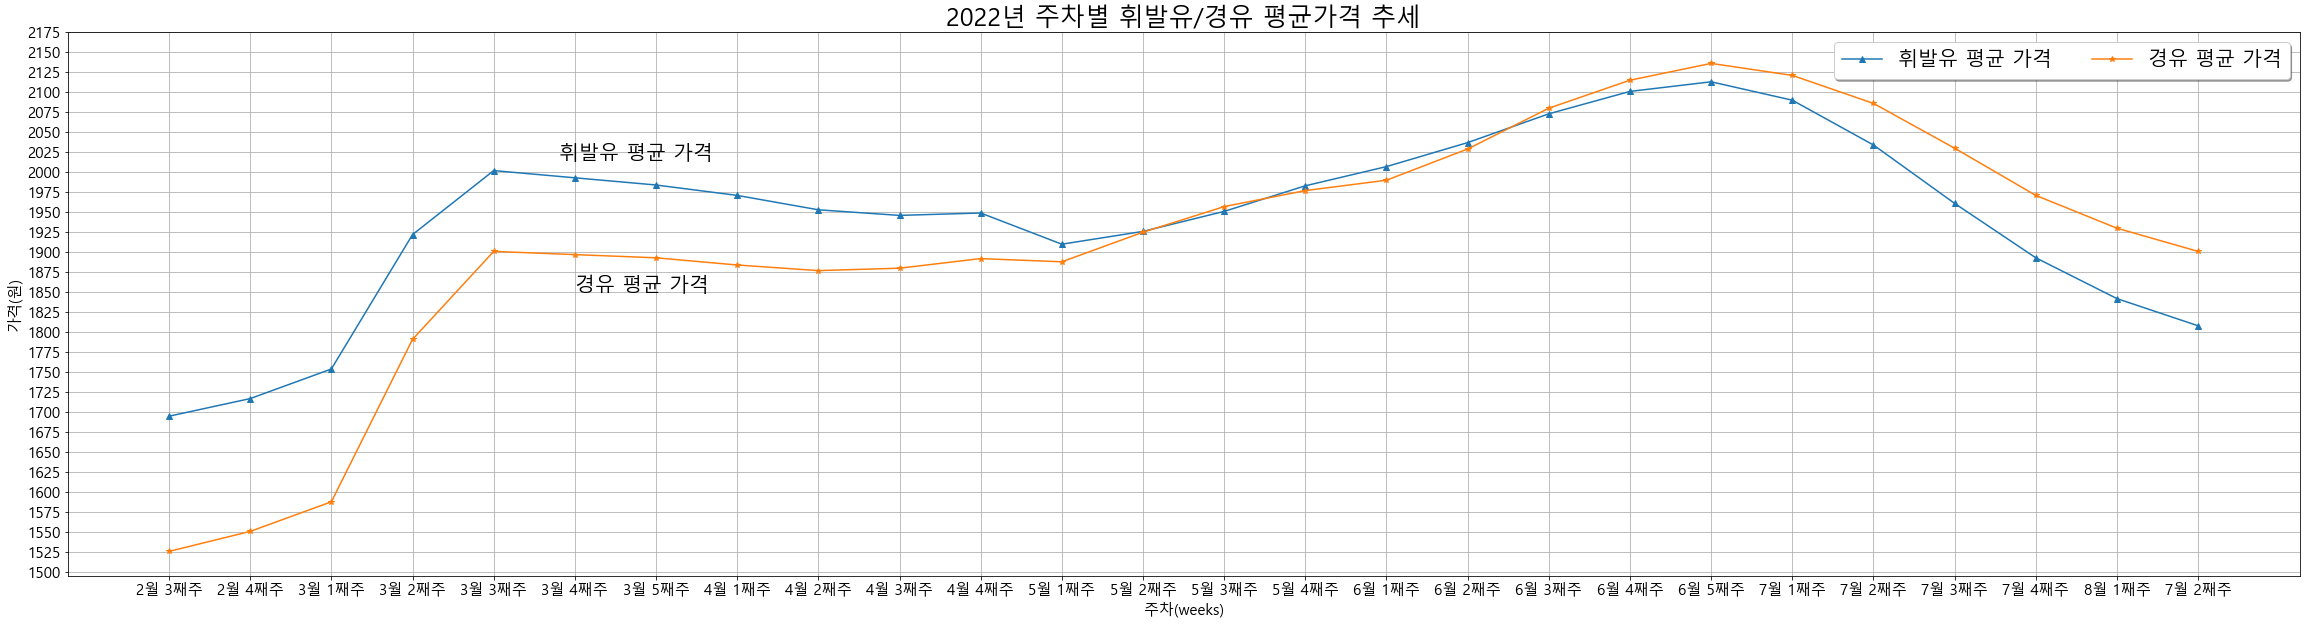

In [34]:
ax1 = all_weekly_avg_price.index
ax2 = all_weekly_avg_price.휘발유_평균가격
ax3 = all_weekly_avg_price.경유_평균가격

plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="휘발유 평균 가격", marker="^") # 휘발유 평균 가격
b = plt.plot(ax1, ax3, label="경유 평균 가격", marker="*") # 경유 평균 가격
p = [a,b]

plt.title("2022년 주차별 휘발유/경유 평균가격 추세", fontsize=25)
plt.xticks(ax1, fontsize=15, labels=["2월 3째주","2월 4째주",
                                     "3월 1째주","3월 2째주","3월 3째주","3월 4째주","3월 5째주",
                                     "4월 1째주","4월 2째주","4월 3째주","4월 4째주",
                                     "5월 1째주","5월 2째주","5월 3째주","5월 4째주",
                                     "6월 1째주","6월 2째주","6월 3째주","6월 4째주","6월 5째주",
                                     "7월 1째주","7월 2째주","7월 3째주","7월 4째주",
                                     "8월 1째주","7월 2째주"]) # x축
plt.text(11.8,2015,'휘발유 평균 가격',fontsize=20) # 그래프 이름
plt.text(12,1850,'경유 평균 가격',fontsize=20)
plt.yticks(np.arange(1500, 2200, 25) ,fontsize=15) # y축
plt.xlabel("주차(weeks)", fontsize=15) #x 축 이름
plt.ylabel("가격(원)", fontsize=15) # y축 이름
plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid()

plt.show()

#### 상표별 휘발유/경유 평균 가격 비교

In [35]:
#상표별 휘발유 평균가격
brand_avg_gasolin = data.groupby(["상표"])["휘발유"].mean().round().to_frame()
brand_avg_gasolin

,휘발유
상표,
GS칼텍스,1943.0
NH-OIL,1915.0
S-OIL,1960.0
SK에너지,1963.0
알뜰주유소,1912.0
자가상표,1947.0
현대오일뱅크,1947.0


In [36]:
#컬럼명 변경
brand_avg_gasolin.rename(columns={"휘발유" : "휘발유_평균가격"}, inplace=True)

In [37]:
#상표별 경유 평균가격
brand_avg_diesel = data.groupby(["상표"])["경유"].mean().round().to_frame()
brand_avg_diesel

,경유
상표,
GS칼텍스,1909.0
NH-OIL,1882.0
S-OIL,1922.0
SK에너지,1931.0
알뜰주유소,1884.0
자가상표,1902.0
현대오일뱅크,1911.0


In [38]:
#컬럼명 변경
brand_avg_diesel.rename(columns={"경유" : "경유_평균가격"}, inplace=True)

In [39]:
#데이터 병합
all_brand_avg_price = pd.merge(brand_avg_gasolin, brand_avg_diesel, how="inner", left_index=True, right_index=True)
all_brand_avg_price

,휘발유_평균가격,경유_평균가격
상표,,
GS칼텍스,1943.0,1909.0
NH-OIL,1915.0,1882.0
S-OIL,1960.0,1922.0
SK에너지,1963.0,1931.0
알뜰주유소,1912.0,1884.0
자가상표,1947.0,1902.0
현대오일뱅크,1947.0,1911.0


In [40]:
#시각화를 위해 평균가격 데이터 타입을 float에서 int로 변경
all_brand_avg_price = all_brand_avg_price.astype("int")

#### 상표별 평균 가격 비교(22년 2월14일 ~ 8월 9일) 시각화

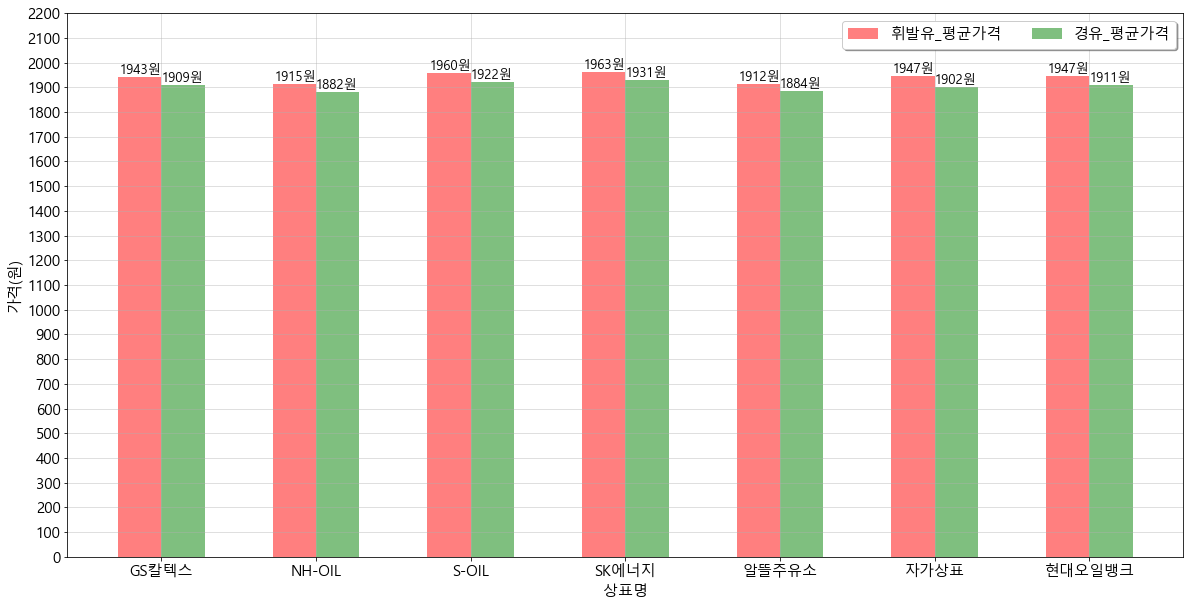

In [41]:
w = 0.28 #widths
nrow = all_brand_avg_price.shape[0] #행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
idx


plt.figure(figsize=(20,10))
plt.bar(idx-w, all_brand_avg_price["휘발유_평균가격"], width=w, align="edge", color="red", alpha=0.5)
plt.bar(idx+w-0.14, all_brand_avg_price["경유_평균가격"], width=w, color="green", alpha=0.5)
plt.xticks(idx, all_brand_avg_price.index, fontsize=15) # x축
plt.yticks(np.arange(0,2300, 100), fontsize=15) # y축
plt.xlabel("상표명", fontsize=15) #x 축 이름
plt.ylabel("가격(원)", fontsize=15) # y축 이름
plt.legend(all_brand_avg_price.columns, loc="best", ncol=nrow, fontsize= 15, shadow=True) # 범례
plt.grid(alpha=0.5)

for idx, value in enumerate(list(all_brand_avg_price["휘발유_평균가격"])): # 휘발유 가격 표시
        txt = '%d원' % value
        plt.text(idx,value,txt,horizontalalignment='right',
                verticalalignment='bottom', fontsize= 13)

for idx, value in enumerate(list(all_brand_avg_price["경유_평균가격"])): # 경유 가격 표시
        txt = '%d원' % value
        plt.text(idx,value,txt,horizontalalignment='left',
                verticalalignment='bottom', fontsize= 13)


plt.show()

#### 구별 평균 휘발유 가격 비교

In [42]:
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,주차
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638.0,1508.0,7
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638.0,1518.0,7
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668.0,1518.0,7
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678.0,1528.0,7
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678.0,1538.0,7


#### 구별 평균 경유 가격 비교